# Instalações Iniciais

In [ ]:
!pip install gcsfs 

In [ ]:
from google.colab import drive 
from google.cloud import storage
import os

In [ ]:
!pip install pandera

In [ ]:
import pandas as pd
import pandera as pa
import numpy as np
import matplotlib.pyplot as plt
import re   # para usar a flag 'ignorecase'

#Análises e Plotagens em Pandas


Buscando Csv Tratado na GCP

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/projeto-final/Data_Frame_tratado_Stack/projFinalStack.csv', sep =',')

In [ ]:
pd.set_option('max_columns', None)

In [ ]:
df.head(1)

,Id,AreaAtuacao,Emprego,Pais,Escolaridade,AnosProg,AnosProgProf,LingJaTrab,BDJaTrab,CloudJaTrab,EstWebJaTrab,OutrasJaTrab,FerramJaTrab,AmbDevJaTrab,SO,Idade,DefFis,TipoDev,Genero,Etnia
0,1,desenvolvedor profissional,"contrato independente, freelancer ou autonomo",Eslovaquia,ensino medio,NaN,NaN,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,PostgreSQL;SQLite,NaN,Laravel;Symfony,NaN,NaN,PHPStorm;Xcode,MacOS,25-34 anos de idade,nao,outro,Homem,branco


In [ ]:
#tipo d elementos no DataFrame
df.dtypes

Id                int64
AreaAtuacao      object
Emprego          object
Pais             object
Escolaridade     object
AnosProg        float64
AnosProgProf    float64
LingJaTrab       object
BDJaTrab         object
CloudJaTrab      object
EstWebJaTrab     object
OutrasJaTrab     object
FerramJaTrab     object
AmbDevJaTrab     object
SO               object
Idade            object
Genero           object
DefFis           object
TipoDev          object
Etnia            object
dtype: object

Criação da variável df_plot_tipodev para plotagem posterior

In [ ]:
df_plot_tipodev = df['TipoDev'].value_counts()

In [ ]:
df_plot_tipodev

fullstack             26550
cientista de dados    13010
outro                 12200
backend               10726
frontend               3998
Name: TipoDev, dtype: int64

Países

In [ ]:
df['Pais'].unique()

array(['Eslovaquia', 'Holanda', 'Federacao Russa', 'Austria',
       'Reino Unido', 'Estados Unidos da America', 'Malasia', 'India',
       'Suecia', 'Espanha', 'Alemanha', 'Peru', 'Canada', 'Cingapura',
       'Brasil', 'Franca', 'Suica', 'Malawi', 'Israel', 'Polonia',
       'Ucrania', 'Vietna', 'Portugal', 'Italia', 'Bulgaria', 'Grecia',
       'Iran, Islamic Republic of...', 'Irlanda', 'Georgia',
       'Uzbequistao', 'Hungria', 'Belgica', 'Paquistao', 'Nigeria',
       'Albania', 'Bangladesh', 'Romenia', 'Sri Lanka', 'Lituania',
       'Eslovenia', 'Croacia', 'Republica Checa', 'Dinamarca', 'Armenia',
       'Libano', 'Bahrein', 'Egito', 'Nepal', 'Colombia', 'Indonesia',
       'Australia', 'Turcomenistao', 'Marrocos', 'Chile', 'Servia',
       'Nova Zelandia', 'Estonia', 'Tunisia', 'Finlandia',
       'Hong Kong (S.A.R.)', 'Emirados Arabes Unidos', 'Argentina',
       'Azerbaijao', 'Filipinas', 'Costa Rica', 'Africa do Sul', 'Kosovo',
       'Japao', 'Republica Unida da Tanzania'

Número de países

In [ ]:
len(df['Pais'].unique())

# 180 países

180

Número de brasileiros

In [ ]:
df['Pais'].value_counts()['Brasil']

# 2254 brasileiros

2254

Percentual de brasileiros

In [ ]:
print(df['Pais'].value_counts(normalize=True)['Brasil'])

# 2,7% de brasileiros

0.027013746569350065


Homens e mulheres

In [ ]:
df['Genero'].unique()

array(['Homem', 'outro', 'Mulher', nan], dtype=object)

Percentual de homens e mulheres

In [ ]:
numHomens = len(df[df['Genero'].str.contains('Homem', na = False)])
numMulheres = len(df[df['Genero'].str.contains('Mulher', na = False)])

pctHomens = numHomens / (numHomens + numMulheres) * 100
pctMulheres = 100 - pctHomens

print(pctHomens)
print(pctMulheres)


94.51580531861515
5.4841946813848494


Criação da variável df_plot_genero para plotagem posterior

In [ ]:
df_plot_genero = df['Genero'].value_counts()

Coluna acessibilidade

In [ ]:
df['DefFis'].unique()

array(['nao', 'sim', nan, 'prefiro nao dizer', 'outros'], dtype=object)

In [ ]:
df['DefFis'].unique()
df_deficientes = df.query("DefFis != 'outros'")
df_deficientes.query("DefFis != 'prefiro nao dizer'",inplace=True)
df_deficientes = df_deficientes[df_deficientes['DefFis'].notna()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Percentual de deficientes

In [ ]:
len(df_deficientes) / len(df) * 100

89.69786310957706

Etnia

In [ ]:
df["Etnia"].unique()

array(['branco', 'prefere nao dizer', 'nao sabe', 'nao branco', nan],
      dtype=object)

Criação da variável df_plot_etnia para plotagem posterior

In [ ]:
df_plot_etnia = df.value_counts()

In [ ]:
df_etnia = df
df_etnia = df_etnia[df_etnia['Etnia'].notna()]

numBrancos = len(df[df['Etnia'].str.contains('branco', na = False)])

pctBrancos = numBrancos / len(df_etnia) * 100
pctNaoBrancos = 100 - pctBrancos
print(pctBrancos)
print(pctNaoBrancos)

93.10882915534079
6.891170844659214


Plataformas de nuvem

In [ ]:
pd.set_option("display.max_rows", None)
print(df['CloudJaTrab'].value_counts().head(20))

AWS                                              11454
Microsoft Azure                                   6660
Google Cloud Platform                             4654
Heroku                                            3865
AWS;Google Cloud Platform                         3116
AWS;Microsoft Azure                               2929
AWS;Heroku                                        2289
DigitalOcean                                      1931
AWS;DigitalOcean                                  1670
AWS;Google Cloud Platform;Microsoft Azure         1391
Google Cloud Platform;Microsoft Azure             1098
AWS;Google Cloud Platform;Heroku                   944
Google Cloud Platform;Heroku                       897
AWS;DigitalOcean;Google Cloud Platform             820
AWS;DigitalOcean;Heroku                            734
Heroku;Microsoft Azure                             577
DigitalOcean;Heroku                                557
AWS;DigitalOcean;Google Cloud Platform;Heroku      552
DigitalOce

In [ ]:
df.head(1)

,Id,AreaAtuacao,Emprego,Pais,Escolaridade,AnosProg,AnosProgProf,LingJaTrab,BDJaTrab,CloudJaTrab,EstWebJaTrab,OutrasJaTrab,FerramJaTrab,AmbDevJaTrab,SO,Idade,Genero,DefFis,TipoDev,Etnia
0,1,desenvolvedor profissional,"contrato independente, freelancer ou autonomo",Eslovaquia,ensino medio,NaN,NaN,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,PostgreSQL;SQLite,NaN,Laravel;Symfony,NaN,NaN,PHPStorm;Xcode,MacOS,25-34 anos de idade,Man,nao,outro,branco


Bancos de dados

In [ ]:
pd.set_option("display.max_rows", None)
print(df['BDJaTrab'].value_counts().head(20))

MySQL                              4777
Microsoft SQL Server               3823
PostgreSQL                         3537
SQLite                             2191
MongoDB                            1656
MySQL;SQLite                       1450
Firebase                           1208
PostgreSQL;SQLite                  1194
MySQL;PostgreSQL                   1190
MariaDB;MySQL                      1183
MongoDB;MySQL                      1116
Microsoft SQL Server;MySQL         1045
PostgreSQL;Redis                    969
Oracle                              862
MySQL;PostgreSQL;SQLite             727
MongoDB;PostgreSQL                  715
Microsoft SQL Server;SQLite         707
Firebase;MySQL                      569
Microsoft SQL Server;PostgreSQL     556
Firebase;MongoDB                    512
Name: BDJaTrab, dtype: int64


Tipo de desenvolvedor

In [ ]:
pd.reset_option("display.max_rows")
numDevType = len(df[df['TipoDev'].notna()])
numData = len(df[df['TipoDev'].str.contains('Data', flags=re.IGNORECASE, regex=True, na = False)])
pctData = (numData / numDevType) * 100
print(numData)
print(numDevType)
print(pctData)

0
66484
0.0


In [ ]:
pd.set_option("display.max_rows", None)
print(df['TipoDev'].value_counts().head(20))

fullstack             26550
cientista de dados    13010
outro                 12200
backend               10726
frontend               3998
Name: TipoDev, dtype: int64


Plotagem com Pandas

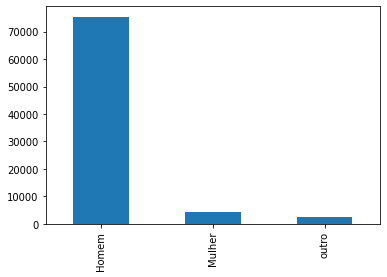

In [ ]:
import matplotlib.pyplot as plt

plt.close("all")

ax = df_plot_genero.plot.bar()
#plt.show()

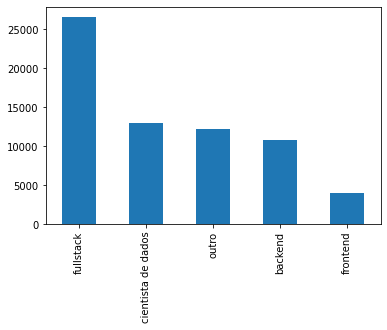

In [ ]:
ax = df_plot_tipodev.plot.bar()